## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys, cv2, glob, os, time
import pandas as pd 
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
import matplotlib.pyplot as plt

NoBee
Bee
NoQueen


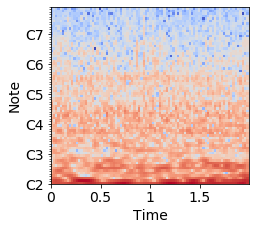

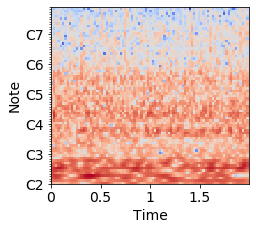

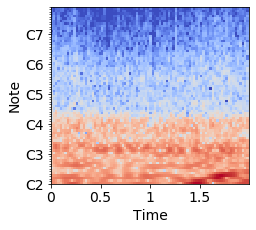

In [149]:
import matplotlib.pyplot as plt
print("NoBee")
s, fs = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\nobee\\CF003 - Active - Day - (214)-7-0.wav")
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y=s, sr=fs, fmin=fmin, n_bins=72, hop_length=hop_length)
#display
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(3, 3))
librosa.display.specshow(logC, sr=fs, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.tight_layout(pad=0)
plt.savefig('CQTNoBee.pdf', bbox_inches='tight')

import matplotlib.pyplot as plt
print("Bee")
s, fs = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\bee\\CF003 - Active - Day - (214)-0-0.wav")
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y=s, sr=fs, fmin=fmin, n_bins=72, hop_length=hop_length)
#display
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(3, 3))
librosa.display.specshow(logC, sr=fs, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.tight_layout(pad=0)
plt.savefig('CQTBee.pdf', bbox_inches='tight')

import matplotlib.pyplot as plt
print("NoQueen")
s, fs = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\noqueen\\CF001 - Missing Queen - Day --0-0.wav")
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y=s, sr=fs, fmin=fmin, n_bins=72, hop_length=hop_length)
#display
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(3, 3))
librosa.display.specshow(logC, sr=fs, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.tight_layout(pad=0)
plt.savefig('CQTNoQueen.pdf', bbox_inches='tight')

There is 0 csv file in the current version of the dataset:


In [37]:
def get_images(directory):
    cqtFeature = []
    Labels = [] 
    
    for labels in os.listdir(directory): 
        
        for image_file in os.listdir(directory+labels): 
            s, fs = librosa.load(directory+labels+r'/'+image_file) 
            fmin = librosa.midi_to_hz(36)
            hop_length = 512
            C = librosa.cqt(y=s, sr=fs, fmin=fmin, n_bins=72, hop_length=hop_length)
            cqtFeature.append(C)
            Labels.append(labels)
    
    return shuffle(cqtFeature,Labels,random_state=817328462) #Shuffle the dataset you just prepared.



In [40]:
#Train data
cqtFeature, Labels = get_images("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\") #Extract the training images from the folders.

cqtFeature = np.array(cqtFeature) #converting the list of images to numpy array.
Labels = np.array(Labels)


In [41]:
from collections import Counter
Counter(Labels)

Counter({'bee': 5473, 'noqueen': 4861, 'nobee': 3458})

In [2]:
cqtFeature = np.load('C:\\Users\\Sohail_Comp\\Desktop\TextMining\\Bee or not bee\\cqtFeature.npy')
Labels = np.load('C:\\Users\\Sohail_Comp\\Desktop\TextMining\\Bee or not bee\\cqtFeaturelabels.npy')

In [3]:
Labels.shape

(13792,)

In [7]:
cqtFeature=cqtFeature.astype(int)

C:\Users\SOHAIL~1\AppData\Local\Temp/ipykernel_5032/2574554940.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  cqtFeature=cqtFeature.astype(int)


In [8]:
cqtFeature.shape

(13792, 72, 87)

In [9]:
n_samples = len(cqtFeature)
data_cqtFeature = cqtFeature.reshape(n_samples, -1)

In [10]:
data_cqtFeature.shape

(13792, 6264)

In [18]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_cqtFeature, Labels, test_size=0.20, shuffle=True)

In [19]:
from collections import Counter
Counter(y_test)

Counter({'bee': 1097, 'nobee': 680, 'noqueen': 982})

In [21]:
Counter(Labels)

Counter({'bee': 5473, 'noqueen': 4861, 'nobee': 3458})

In [20]:
Counter(y_train)

Counter({'bee': 4376, 'nobee': 2778, 'noqueen': 3879})

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.40      1.00      0.58      1080
       nobee       0.29      0.01      0.02       694
     noqueen       0.69      0.05      0.09       985

    accuracy                           0.41      2759
   macro avg       0.46      0.35      0.23      2759
weighted avg       0.47      0.41      0.26      2759



In [84]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.40      0.99      0.57      1061
       nobee       0.26      0.02      0.03       720
     noqueen       0.62      0.05      0.10       978

    accuracy                           0.40      2759
   macro avg       0.43      0.35      0.23      2759
weighted avg       0.44      0.40      0.26      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [85]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.38854657484595867
              precision    recall  f1-score   support

         bee       0.39      1.00      0.56      1061
       nobee       0.23      0.00      0.01       720
     noqueen       0.47      0.01      0.02       978

    accuracy                           0.39      2759
   macro avg       0.36      0.34      0.19      2759
weighted avg       0.38      0.39      0.22      2759



In [86]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.41      0.99      0.58      1061
       nobee       0.37      0.02      0.03       720
     noqueen       0.66      0.12      0.20       978

    accuracy                           0.43      2759
   macro avg       0.48      0.38      0.27      2759
weighted avg       0.49      0.43      0.31      2759



In [125]:
data_cqtFeature1=abs(data_cqtFeature)

In [121]:

# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Convert to categorical data by converting data to integers
X = data_cqtFeature1.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 500)
X_kbest_features = chi2_features.fit_transform(X, Labels)
  
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, Labels, test_size=0.20, shuffle=True)

In [128]:
pca_result.shape

(13792, 2)

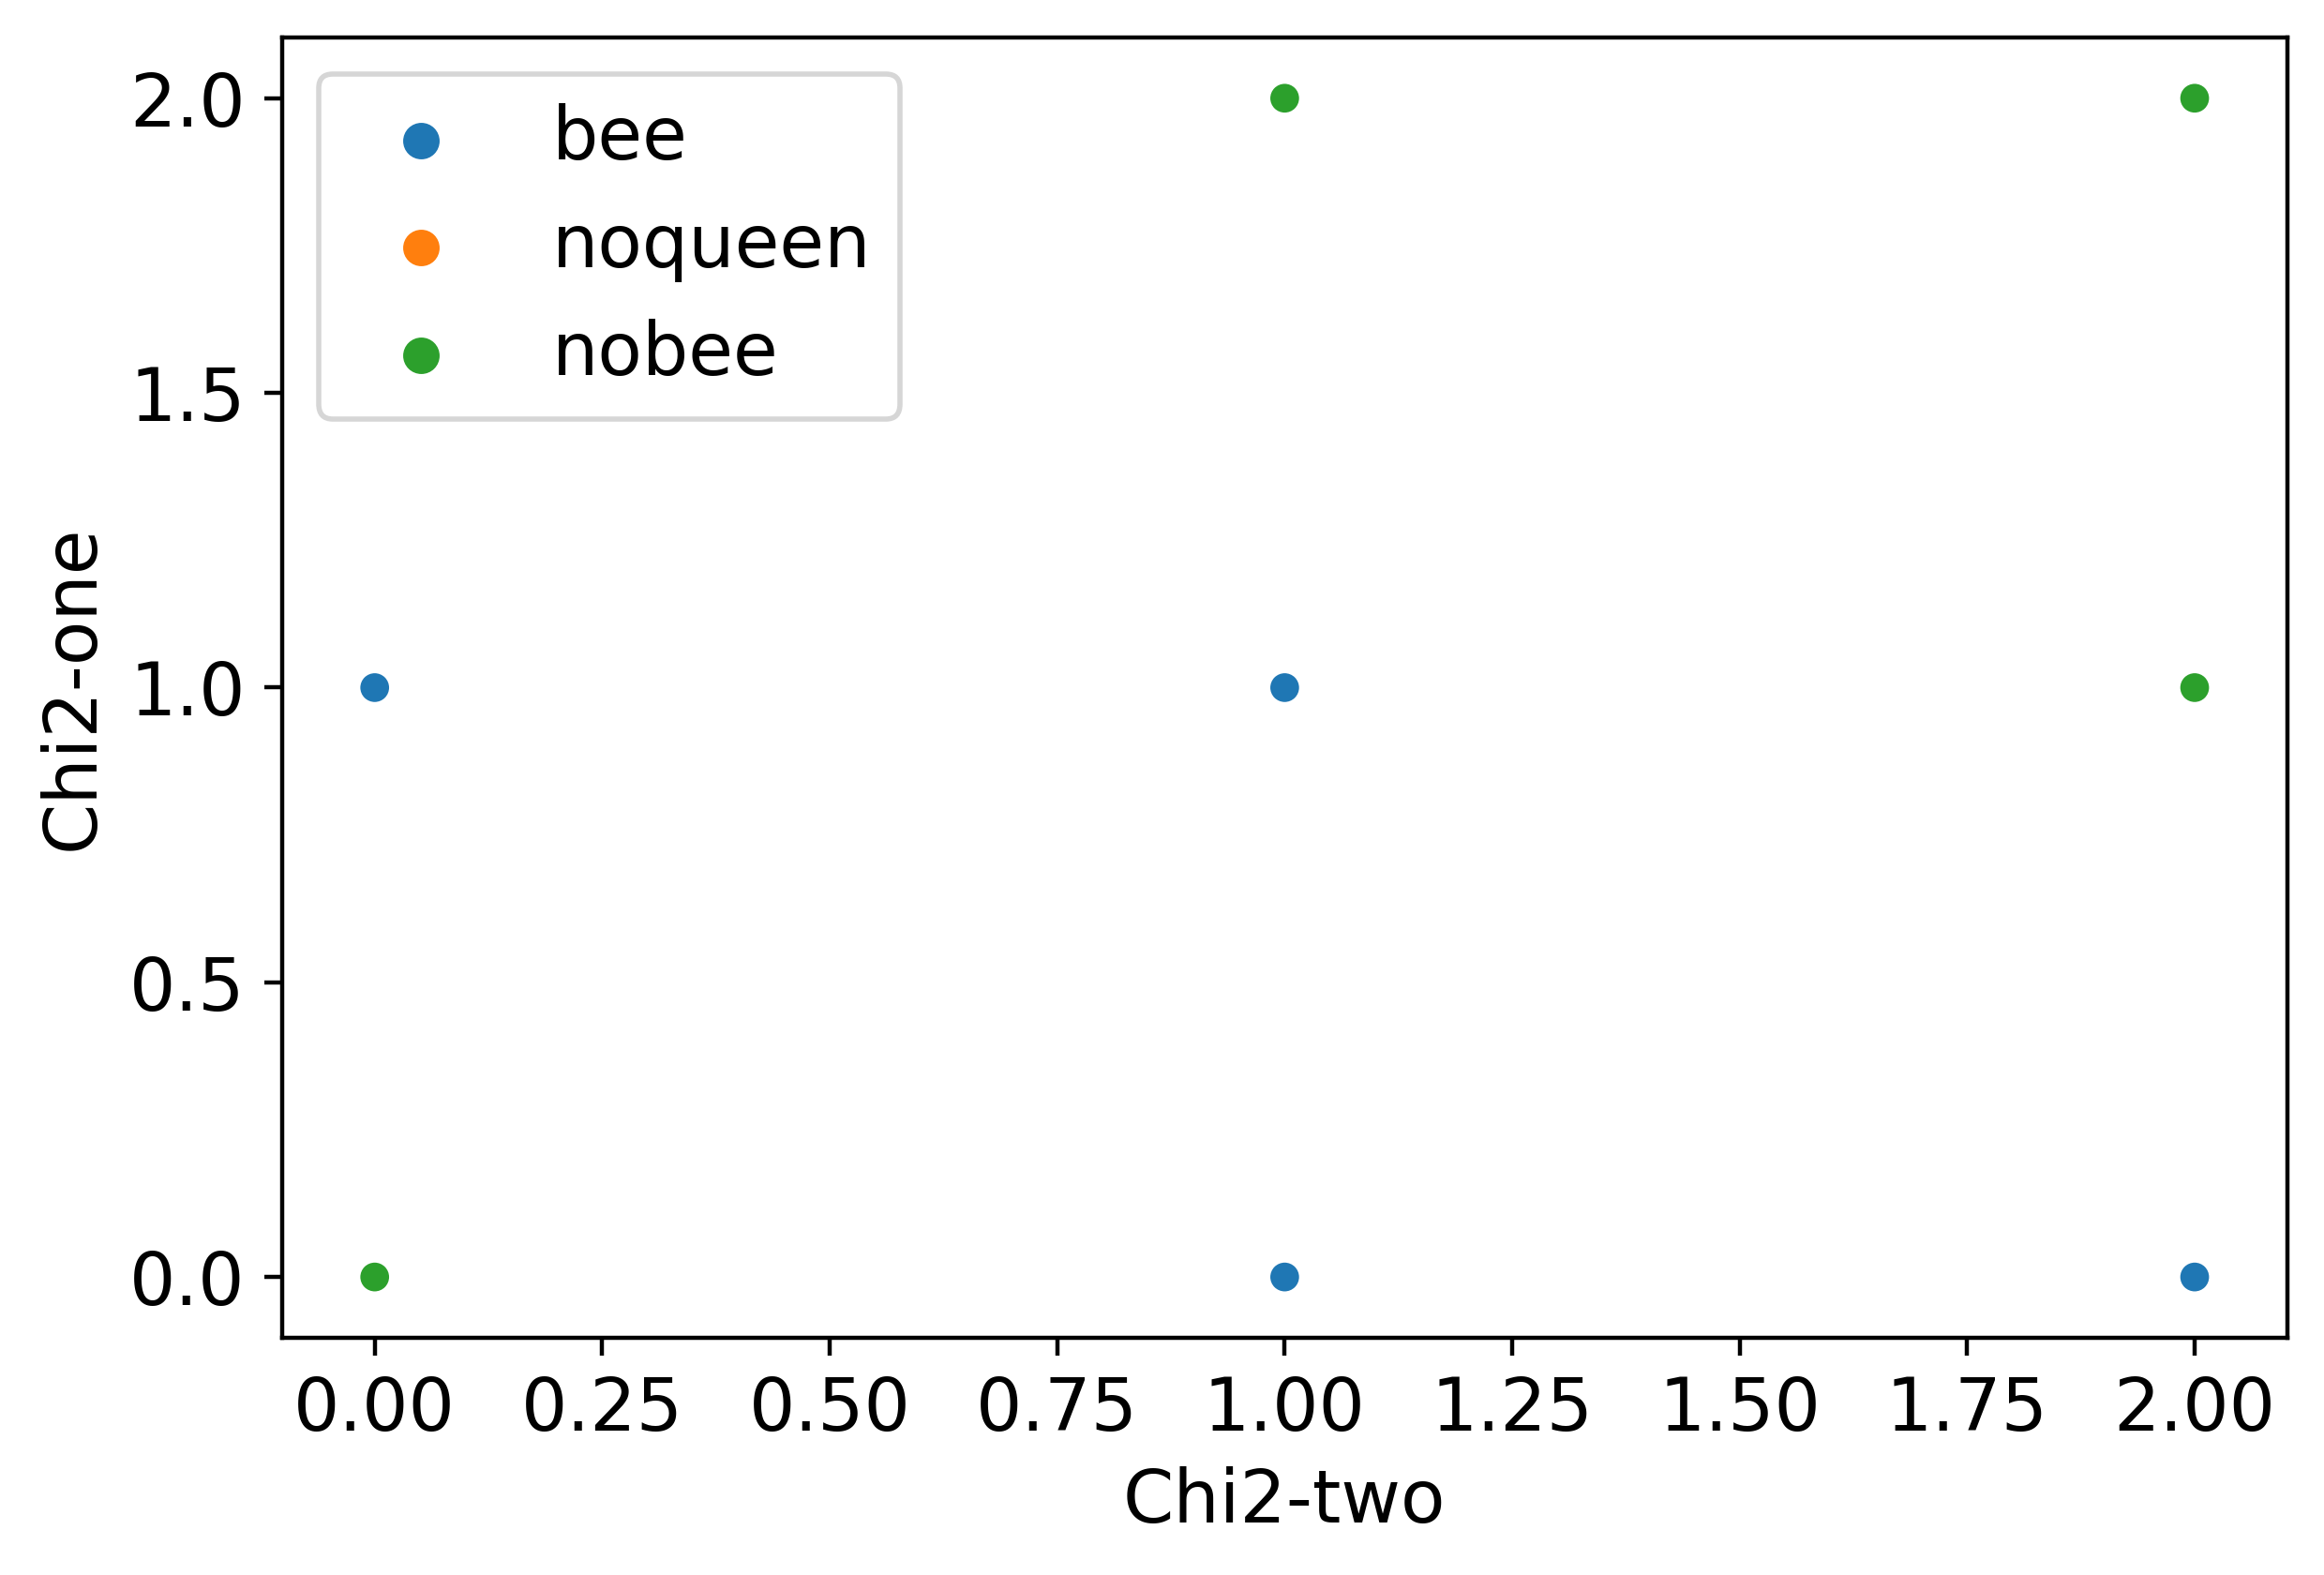

In [148]:
f = pd.DataFrame(data_cqtFeature1)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

df1=f

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])

chi2_features = SelectKBest(chi2, k = 2)
pca_result = chi2_features.fit_transform(df1, Labels)

df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(6,4),dpi=400)
plt.rcParams.update({'font.size': 14})
plt.ylabel('Chi2-one', fontsize=14)
plt.xlabel('Chi2-two', fontsize=14)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=Labels,
    data=df1.loc[rndperm,:],
    legend="full",
    alpha=1.0
)
plt.tight_layout(pad=0)
plt.savefig('cqtFeatureChi2.pdf', bbox_inches='tight')

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.00      0.00      0.00      1106
       nobee       0.26      0.94      0.40       719
     noqueen       0.60      0.07      0.12       934

    accuracy                           0.27      2759
   macro avg       0.28      0.34      0.18      2759
weighted avg       0.27      0.27      0.15      2759



In [94]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.44      0.99      0.61      1132
       nobee       0.36      0.04      0.07       687
     noqueen       0.69      0.09      0.16       940

    accuracy                           0.45      2759
   macro avg       0.50      0.37      0.28      2759
weighted avg       0.50      0.45      0.32      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [95]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.4371148967017035
              precision    recall  f1-score   support

         bee       0.43      0.99      0.60      1132
       nobee       0.37      0.03      0.05       687
     noqueen       0.68      0.07      0.12       940

    accuracy                           0.44      2759
   macro avg       0.49      0.36      0.26      2759
weighted avg       0.50      0.44      0.30      2759



In [96]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.44      0.99      0.61      1132
       nobee       0.52      0.04      0.08       687
     noqueen       0.73      0.11      0.19       940

    accuracy                           0.45      2759
   macro avg       0.56      0.38      0.29      2759
weighted avg       0.56      0.45      0.33      2759



In [98]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
# prepare transform on dataset
svd.fit(data_cqtFeature1)
# apply transform to dataset
transformed = svd.transform(data_cqtFeature1)
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed, Labels, test_size=0.20, shuffle=True)

(13792, 500)

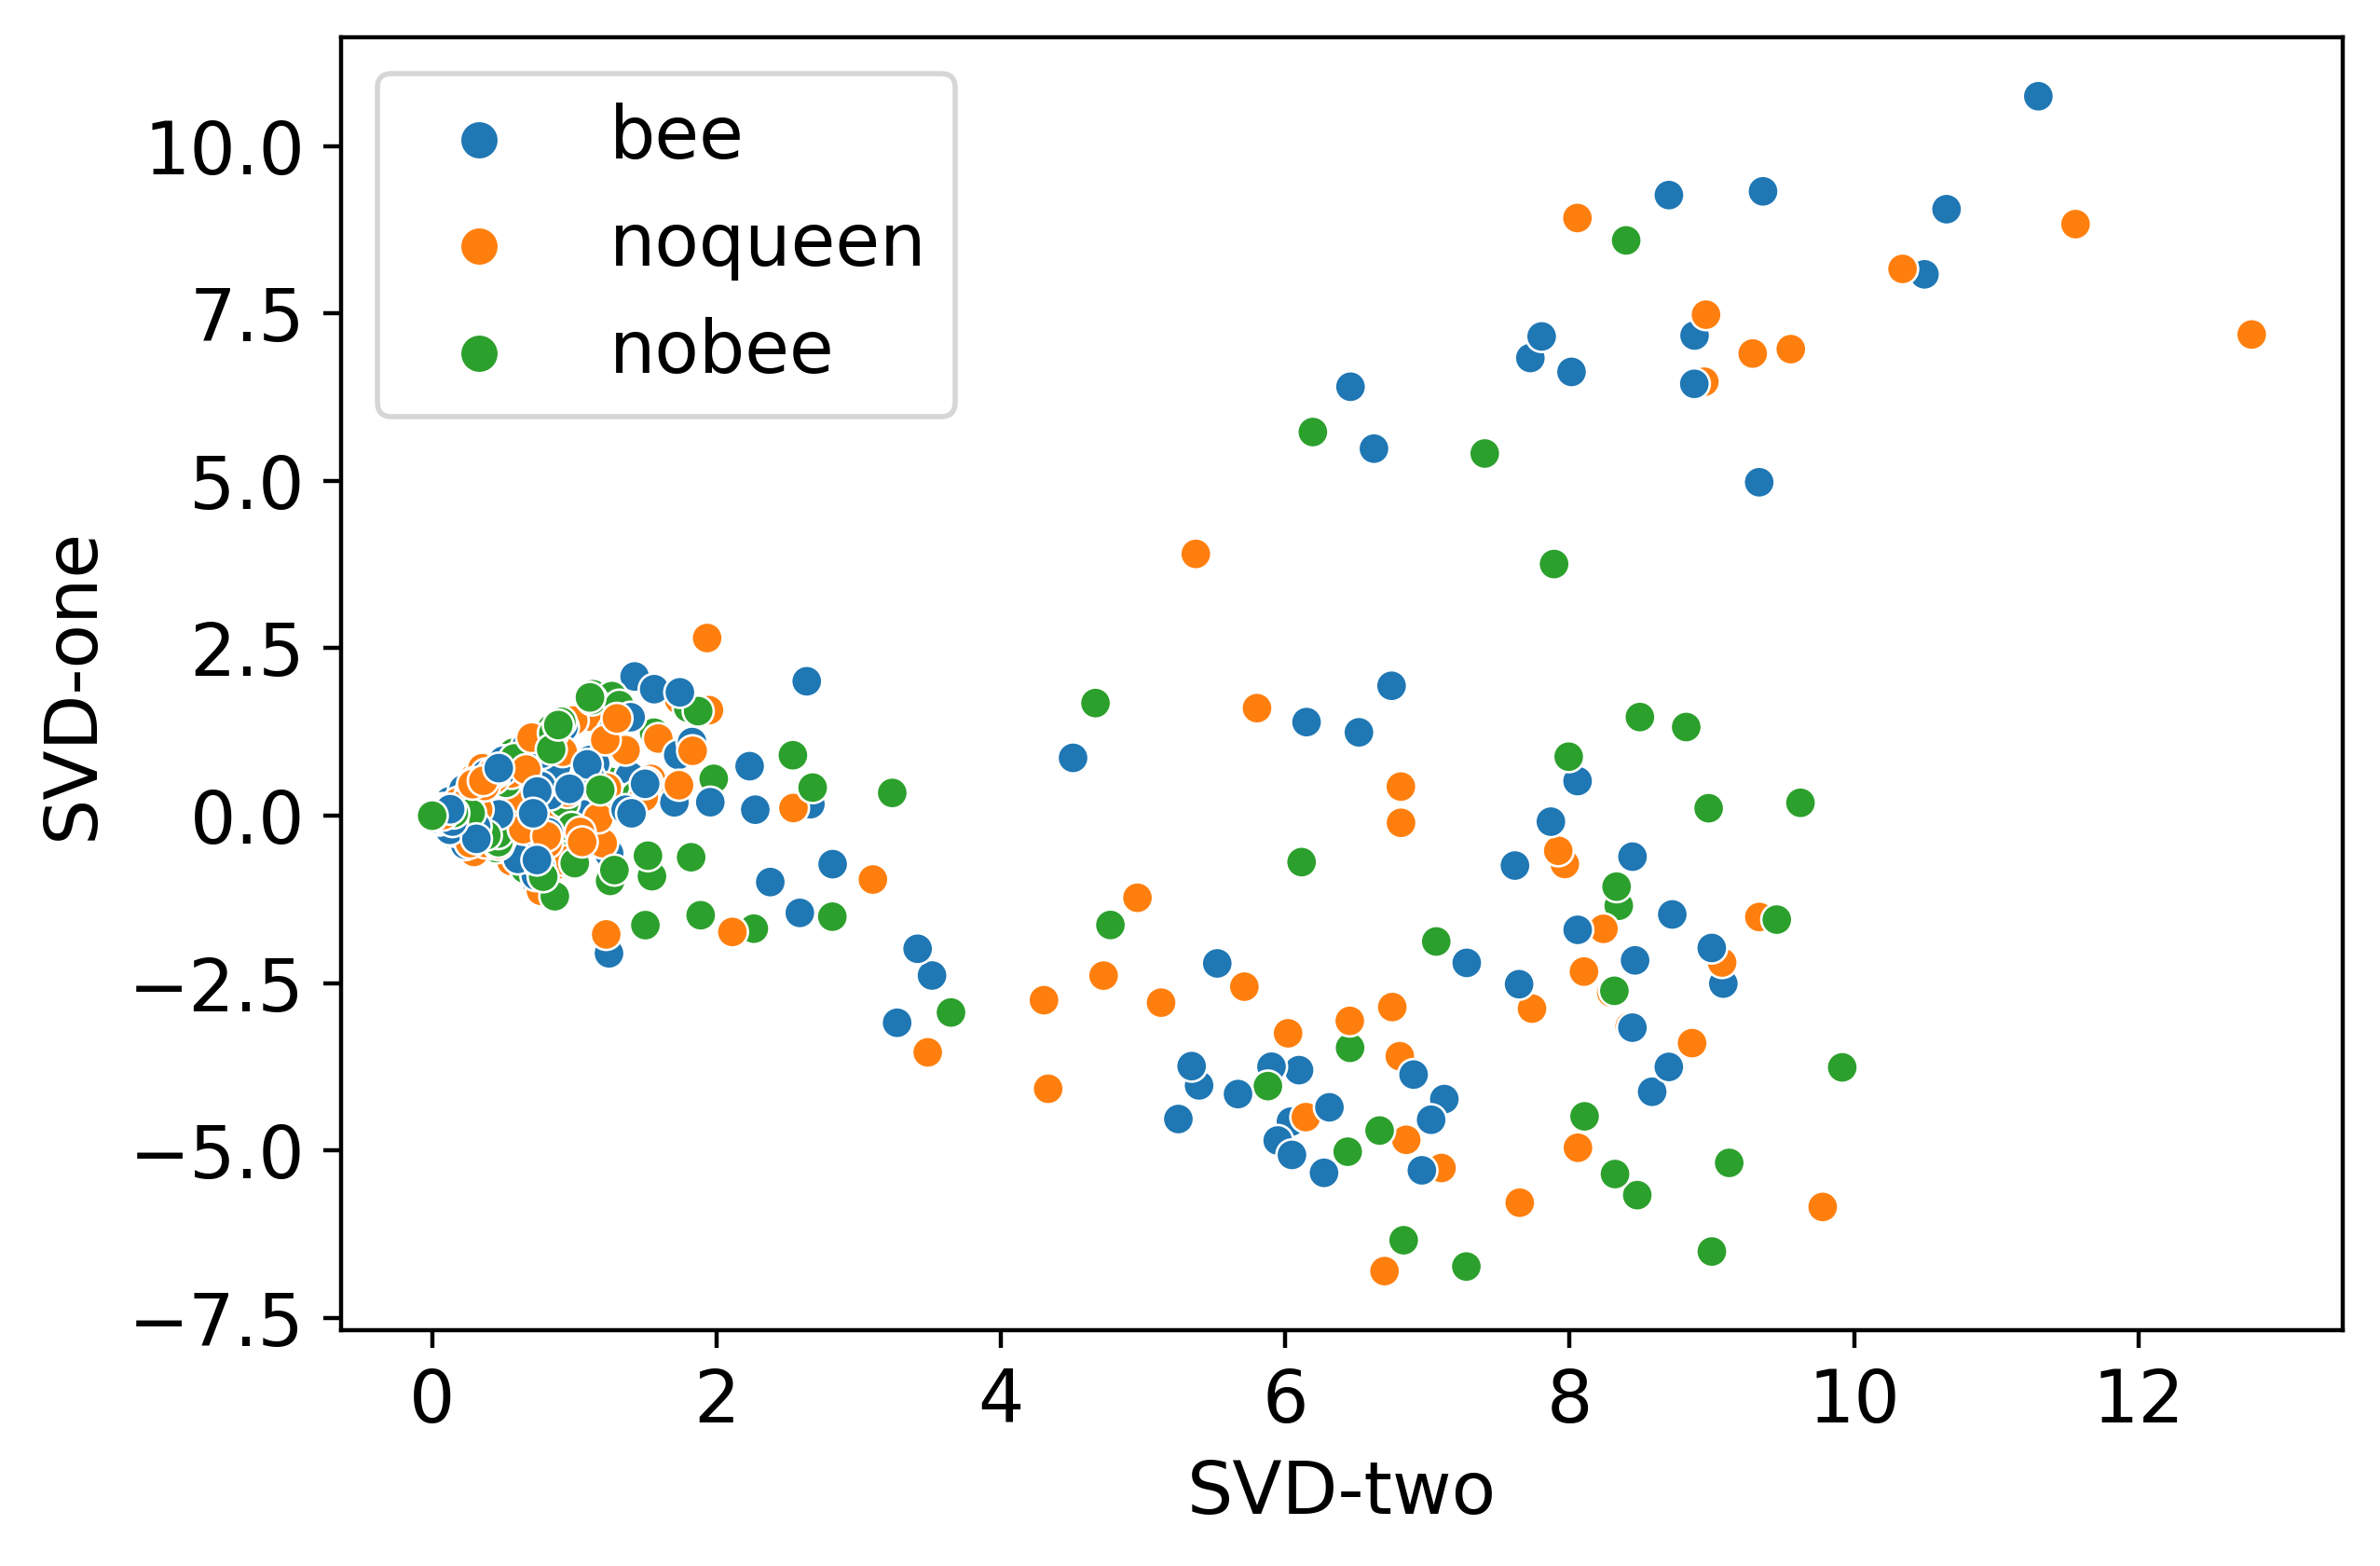

In [114]:
f = pd.DataFrame(data_cqtFeature1)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

df1=f

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])
svd = TruncatedSVD(n_components=2)
# prepare transform on dataset
svd.fit(df1)
# apply transform to dataset
pca_result = svd.transform(df1)

df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(6,4),dpi=400)
plt.rcParams.update({'font.size': 14})
plt.ylabel('SVD-one', fontsize=14)
plt.xlabel('SVD-two', fontsize=14)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=Labels,
    data=df1.loc[rndperm,:],
    legend="full",
    alpha=1.0
)
plt.tight_layout(pad=0)
plt.savefig('cqtSVDs.pdf', bbox_inches='tight')

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.00      0.00      0.00      1106
       nobee       0.26      0.94      0.40       719
     noqueen       0.60      0.07      0.12       934

    accuracy                           0.27      2759
   macro avg       0.28      0.34      0.18      2759
weighted avg       0.27      0.27      0.15      2759



In [100]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.41      0.99      0.58      1046
       nobee       0.26      0.02      0.04       680
     noqueen       0.70      0.09      0.16      1033

    accuracy                           0.42      2759
   macro avg       0.45      0.37      0.26      2759
weighted avg       0.48      0.42      0.29      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [101]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.400144980065241
              precision    recall  f1-score   support

         bee       0.39      1.00      0.56      1046
       nobee       0.32      0.02      0.04       680
     noqueen       0.70      0.05      0.09      1033

    accuracy                           0.40      2759
   macro avg       0.47      0.35      0.23      2759
weighted avg       0.49      0.40      0.26      2759



In [102]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.41      0.98      0.58      1046
       nobee       0.50      0.04      0.08       680
     noqueen       0.75      0.13      0.22      1033

    accuracy                           0.43      2759
   macro avg       0.55      0.38      0.29      2759
weighted avg       0.56      0.43      0.32      2759



In [116]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=500)
pca_result = pca.fit_transform(data_cqtFeature1)
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_result, Labels, test_size=0.20, shuffle=True)

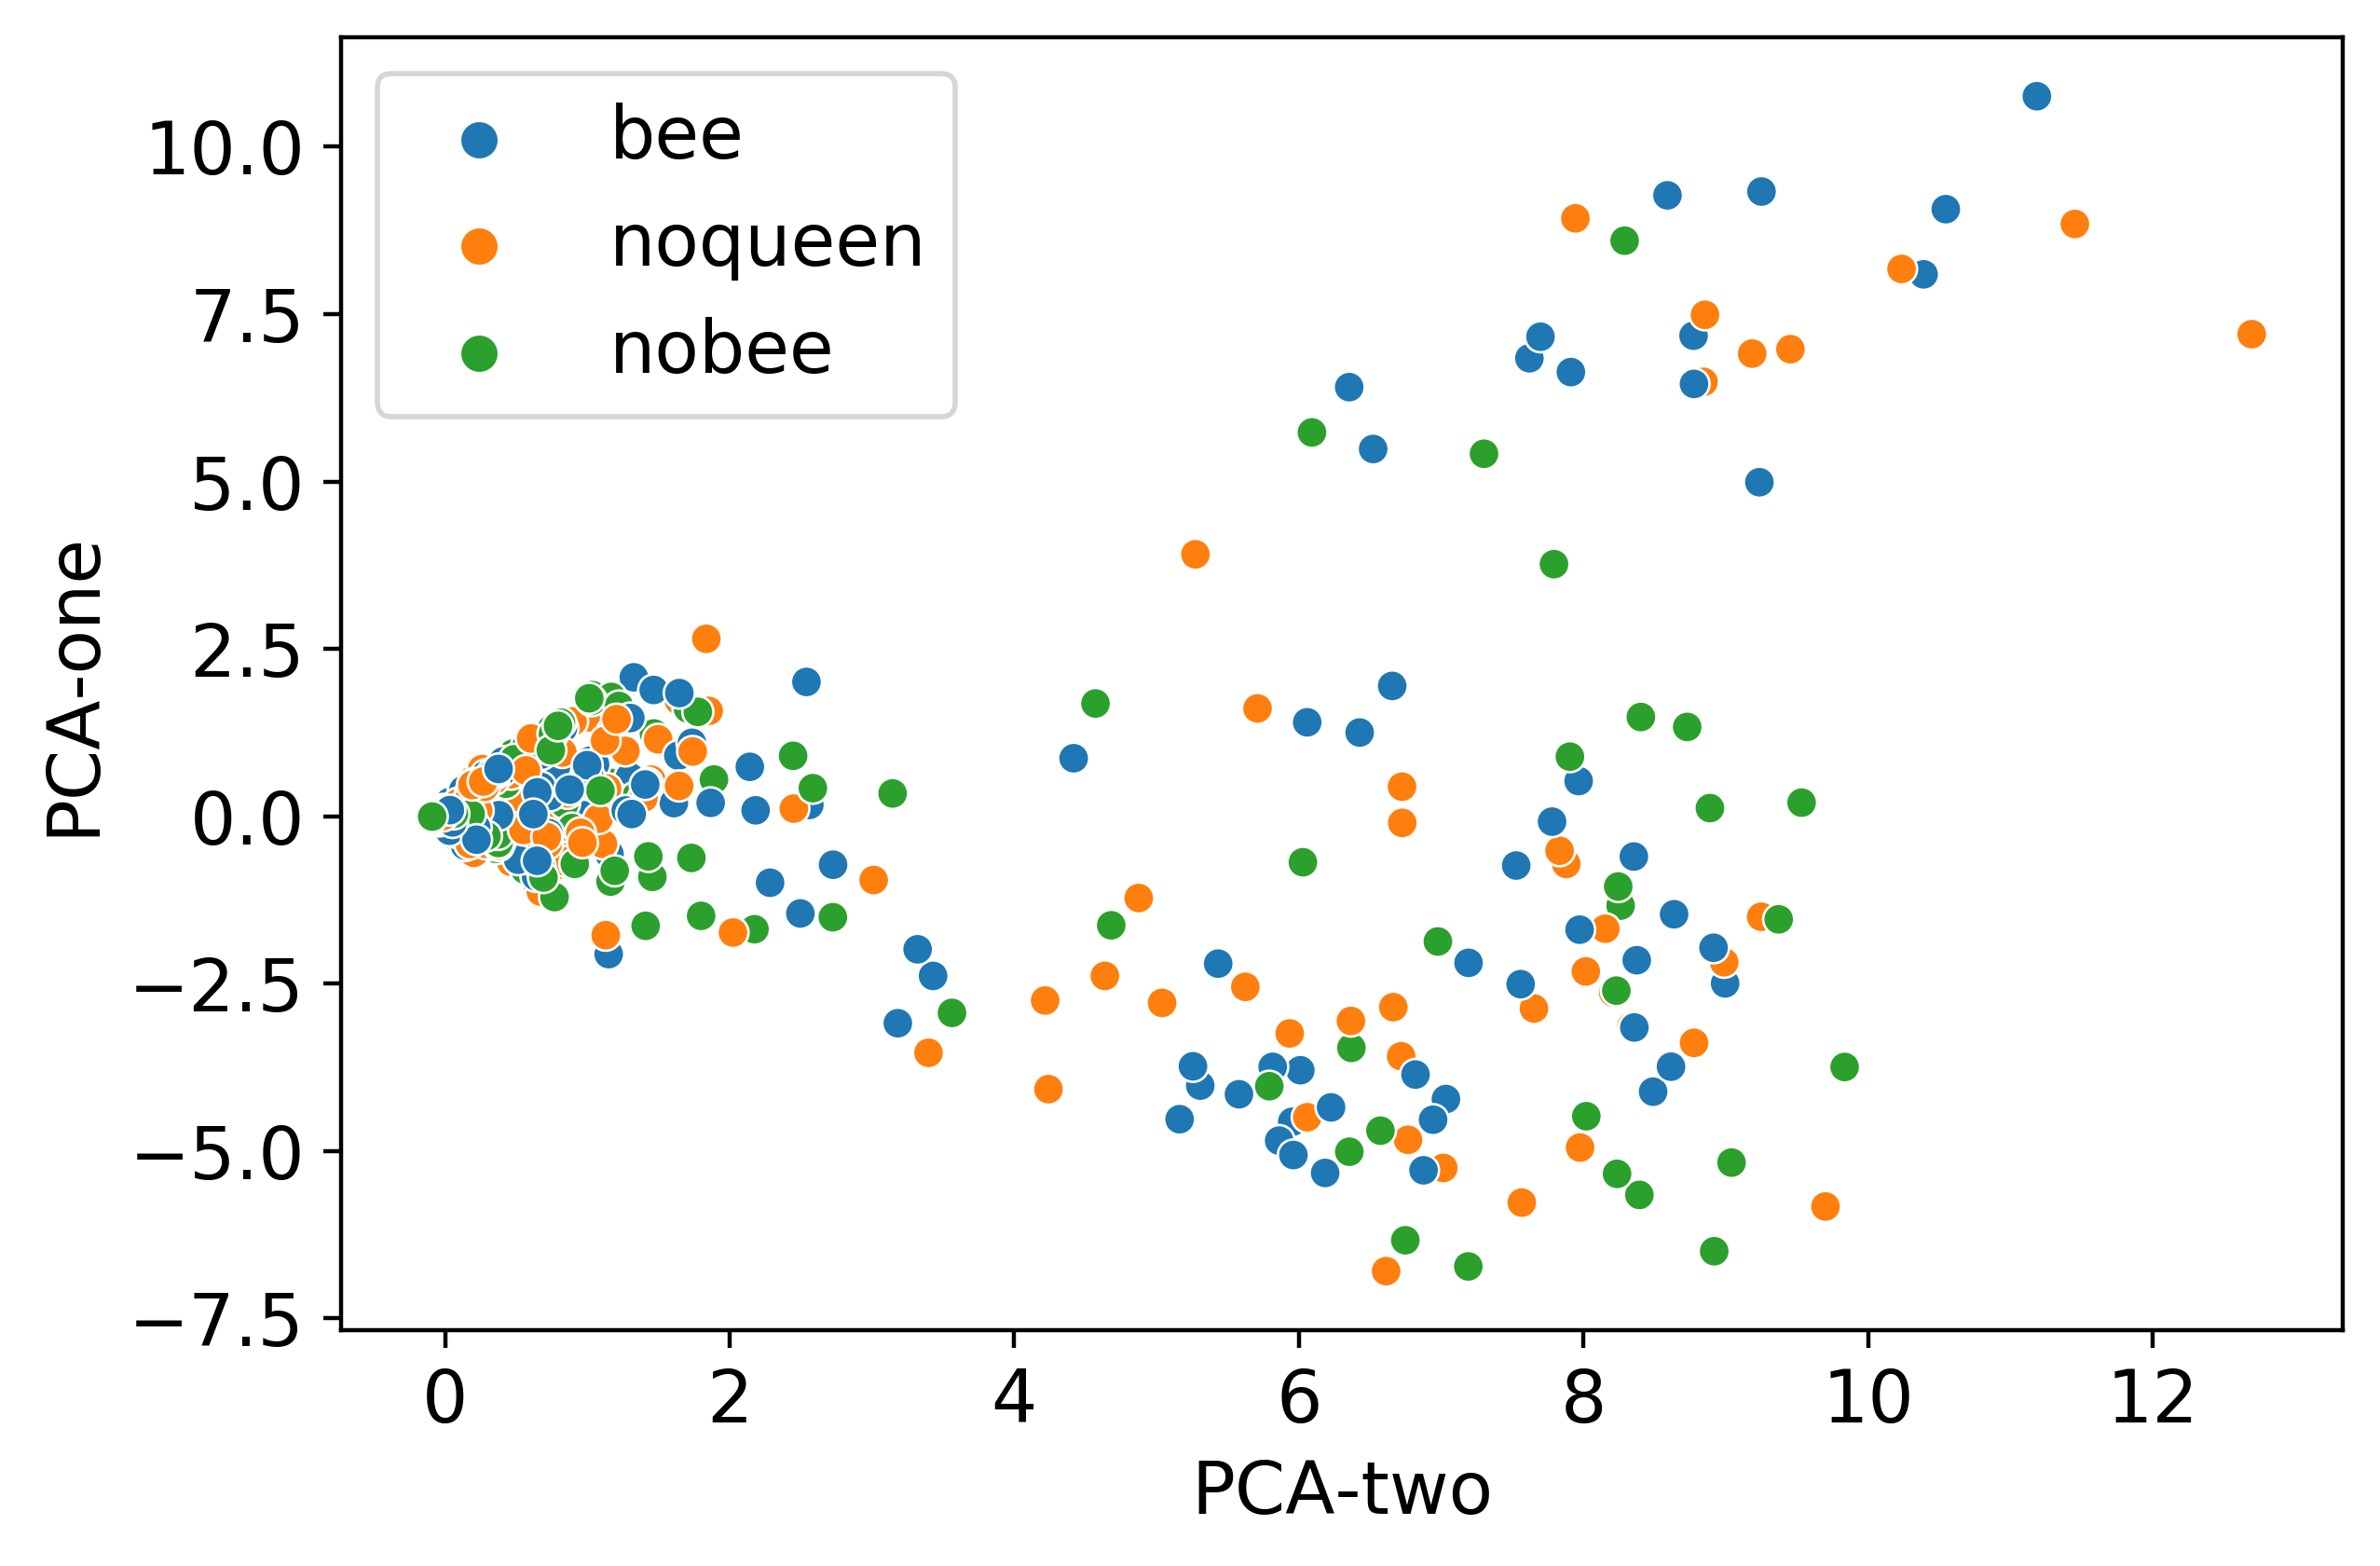

In [118]:
f = pd.DataFrame(data_cqtFeature1)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

df1=f

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1.values)
df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(6,4),dpi=400)
plt.rcParams.update({'font.size': 14})
plt.ylabel('PCA-one', fontsize=14)
plt.xlabel('PCA-two', fontsize=14)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=Labels,
    data=df1.loc[rndperm,:],
    legend="full",
    alpha=1.0
)
plt.tight_layout(pad=0)
plt.savefig('cqtPCA.pdf', bbox_inches='tight')

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.35      0.03      0.06      1093
       nobee       0.25      0.89      0.39       691
     noqueen       0.63      0.10      0.18       975

    accuracy                           0.27      2759
   macro avg       0.41      0.34      0.21      2759
weighted avg       0.42      0.27      0.18      2759



In [104]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.42      0.99      0.59      1072
       nobee       0.37      0.04      0.07       709
     noqueen       0.60      0.08      0.15       978

    accuracy                           0.42      2759
   macro avg       0.46      0.37      0.27      2759
weighted avg       0.47      0.42      0.30      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [105]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.4128307357738311
              precision    recall  f1-score   support

         bee       0.41      1.00      0.58      1072
       nobee       0.44      0.03      0.06       709
     noqueen       0.60      0.05      0.10       978

    accuracy                           0.41      2759
   macro avg       0.48      0.36      0.24      2759
weighted avg       0.48      0.41      0.27      2759



In [106]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.42      0.98      0.59      1072
       nobee       0.58      0.04      0.07       709
     noqueen       0.63      0.12      0.21       978

    accuracy                           0.43      2759
   macro avg       0.54      0.38      0.29      2759
weighted avg       0.53      0.43      0.32      2759



# hybrid

In [136]:
chi=pd.DataFrame(X_kbest_features)
svd=pd.DataFrame(transformed)
pca=pd.DataFrame(pca_result)
mfcc=pd.DataFrame(data_cqtFeature1)
result = pd.concat([chi, svd,pca,mfcc], axis=1).reindex(chi.index)

In [137]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, Labels, test_size=0.20, shuffle=True)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100) 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.41      1.00      0.58      1106
       nobee       0.00      0.00      0.00       687
     noqueen       0.62      0.04      0.08       966

    accuracy                           0.42      2759
   macro avg       0.34      0.35      0.22      2759
weighted avg       0.38      0.42      0.26      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [139]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.43      0.99      0.60      1106
       nobee       0.41      0.05      0.09       687
     noqueen       0.71      0.10      0.17       966

    accuracy                           0.44      2759
   macro avg       0.52      0.38      0.29      2759
weighted avg       0.52      0.44      0.32      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [140]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=2.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.42696629213483145
              precision    recall  f1-score   support

         bee       0.42      0.99      0.59      1106
       nobee       0.47      0.03      0.07       687
     noqueen       0.77      0.06      0.10       966

    accuracy                           0.43      2759
   macro avg       0.55      0.36      0.25      2759
weighted avg       0.55      0.43      0.29      2759



In [141]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.43      0.98      0.60      1106
       nobee       0.62      0.02      0.04       687
     noqueen       0.63      0.15      0.24       966

    accuracy                           0.45      2759
   macro avg       0.56      0.38      0.29      2759
weighted avg       0.55      0.45      0.34      2759



In [144]:
X=X_kbest_features
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.41 +/- 0.00


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.44 +/- 0.00
svc 0.42 +/- 0.00
rf 0.44 +/- 0.00


In [145]:
X=pca_result
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.39 +/- 0.02
Lr 0.40 +/- 0.00
svc 0.40 +/- 0.00
rf 0.40 +/- 0.00


In [146]:
X=transformed
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.41 +/- 0.00


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.44 +/- 0.01
svc 0.42 +/- 0.00
rf 0.45 +/- 0.00


In [147]:
X=data_cqtFeature1
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.41 +/- 0.00


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.44 +/- 0.01
svc 0.42 +/- 0.00
rf 0.44 +/- 0.00


In [143]:
X=result
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.41 +/- 0.00


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.44 +/- 0.01
svc 0.42 +/- 0.00
rf 0.44 +/- 0.00


In [4]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding


In [5]:
>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
le = preprocessing.LabelEncoder()
y = le.fit_transform(Labels)

In [11]:
data_cqtFeature1=abs(data_cqtFeature)

In [12]:
from keras import optimizers
import tensorflow.keras
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=5000,lower=False)
#tokenizer.fit_on_texts(X_train_res.values)
#print(tokenizer.word_index)  # To see the dicstionary
#X = tokenizer.texts_to_sequences(X_train_res.values)
#X = tensorflow.keras.preprocessing.sequence.pad_sequences(X_train_res)
#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(1000,100, input_length=data_cqtFeature1.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(100))
model_conv.add(Dense(3, activation='softmax'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
#Y = data.Reviewer_Score
Y = pd.get_dummies(y).values

X_train, X_valid, Y_train, Y_valid = train_test_split(data_cqtFeature1,Y, test_size = 0.10, random_state =2)
batch_size=128
#Here we train the Network.

pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


KeyboardInterrupt: 

In [17]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples
data1 = [0.78,0.78,0.76,0.79]
data2 = [0.48,0.48,0.56,0.59]
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=8.682, df=6, cv=1.943, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [13]:
# t-test for dependent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# number of paired samples
	n = len(data1)
	# sum squared difference between observations
	d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([data1[i]-data2[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples (pretend they are dependent)
data1 = [0.78,0.78,0.76,0.79]
data2 = [0.48,0.48,0.46,0.49]
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

ValueError: math domain error

<Figure size 6000x15000 with 0 Axes>

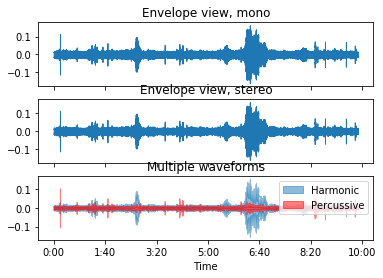

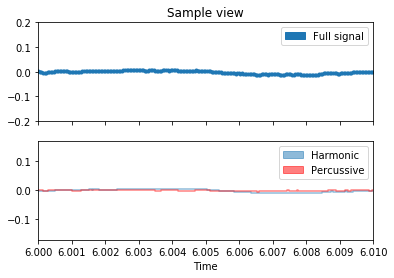

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
plt.figure(figsize=(20,50),dpi=300)
y, sr = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\archive (9)\\Hive1_31_05_2018_NO_QueenBee_H1_audio___15_00_00.wav")


fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()


librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()


fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

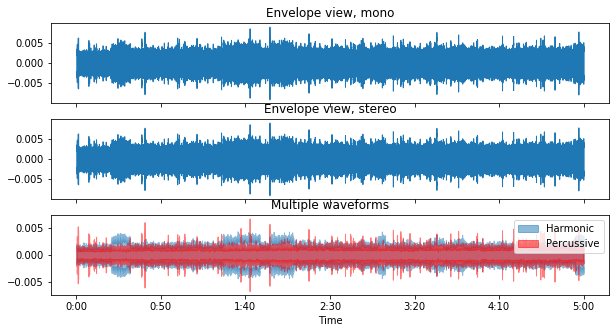

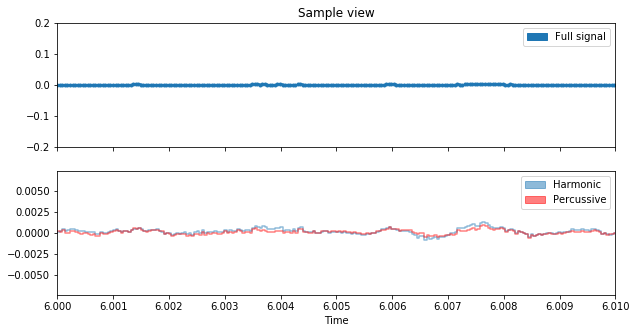

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn


y, sr = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\archive (9)\\CF003 - Active - Day - (215).wav")

fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()


librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()


fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Oh, no! There are no automatic insights available for the file types used in this dataset. As your Kaggle kerneler bot, I'll keep working to fine-tune my hyper-parameters. In the meantime, please feel free to try a different dataset.

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!